# **<center>Data Wrangling**

In [1]:
import os
import warnings

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

plt.style.use('dark_background')

[Loan Data](https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset?select=loan)

In [ ]:
# Download the data from the kaggle api
kaggle datasets download -d ranadeep/credit-risk-dataset
# unzip the data 
unzip credit-risk-dataset.zip -d credit-risk-dataset -p ./data/raw

In [2]:
os.chdir('..')

In [3]:
# Load in the data with low_memory as False so that it can understand dtype
loan = pd.read_csv('./data/raw/loan.csv', low_memory = False)
# Print out the shape of the dataset
print(loan.shape)
# Print out a sample of the dataset
loan.head()

(887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical Columns

In [110]:
# Create a dictionary that has the columns and keys and dtype as values
dtype_dict = dict(zip(loan.columns, loan.dtypes))
# Loop over the keys and values in the items of dtype_dict
for k,v in dtype_dict.items():
    # only take the items that aren't numeric
    if v not in ['int64', 'float64']:
        # Print out the columns that don't have numeric keys
        print(k)

term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
earliest_cr_line
initial_list_status
last_pymnt_d
next_pymnt_d
last_credit_pull_d
application_type
verification_status_joint


In [70]:
loan['url'].str[:61].unique()

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id='],
      dtype=object)

In [62]:
set(loan['id']) - set(loan['url'].str.replace(r'\D+', '', regex = True).astype('int'))

set()

In [72]:
print(len(loan['emp_title'].unique()))
loan['emp_title'].value_counts()

299272


Teacher                                     13469
Manager                                     11240
Registered Nurse                             5525
Owner                                        5376
RN                                           5355
                                            ...  
Thomas J. Paul, Inc.                            1
Piggie Toes Preschool                           1
greystone park psychiatric hospital             1
Las Vegas Motropolitan Police Department        1
Manager Hotel Operations Oasis                  1
Name: emp_title, Length: 299271, dtype: int64

In [82]:
loan['desc'].str.capitalize()[31:].value_counts(normalize = True)

                                                                                                                                                                                                                                                                                                                                                                       0.001952
Debt consolidation                                                                                                                                                                                                                                                                                                                                                     0.000143
  borrower added on 02/19/14 > debt consolidation<br>                                                                                                                                                                                                                   

Columns to drop:
 - **id**: This is not a relational database so there is no value in having a variable that can tie this dataset to others.
 - **member_id**: same as ID, there are no other datasets for that need a bridge variable.
 - **url**: This column is f'https://www.lendingclub.com/browse/loanDetail.action?loan_id={id}' where id is the value of the ID column for the specific row
 - **emp_title:** There are too many employment titles. People confused job type with company name so dummy encoding would be a nightmare
 - **desc:** Too many reasons for loans. Without a large Language model to process them I don't know how to evaluate all the different descriptions

In [27]:
loan = loan.drop(['id', 'member_id', 'url', 'emp_title'], axis = 1)

887379

In [84]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Convert the term column to years instead of a string defining the amount of months the loan is for

In [90]:
loan['term'] = loan['term'].str.replace(' 36 months','3').str.replace( ' 60 months', '5').astype('int')
loan['term']

0         3
1         5
2         3
3         3
4         5
         ..
887374    3
887375    3
887376    5
887377    5
887378    3
Name: term, Length: 887379, dtype: object

Create a dictionary with a description of all the different columns. The column names are sometimes unintuitive so it is helpful to have this dictionary.

In [23]:
# Disable warning that openpyxl generates that is impossible to get around
warnings.filterwarnings("ignore")
# Read the dictionary in to python saved as LCDD
LCDD = pd.read_excel('./data/raw/LCDataDictionary.xlsx')
# Turn Warnings back on for the rest of the notebook
warnings.filterwarnings("always")
# Create the dictionary with the columns as keys and the descriptions as values
col_defs = dict(zip(LCDD['LoanStatNew'],LCDD['Description']))
# Show the dictionary
col_defs

{'addr_state': 'The state provided by the borrower in the loan application',
 'annual_inc': 'The self-reported annual income provided by the borrower during registration.',
 'annual_inc_joint': 'The combined self-reported annual income provided by the co-borrowers during registration',
 'application_type': 'Indicates whether the loan is an individual application or a joint application with two co-borrowers',
 'collection_recovery_fee': 'post charge off collection fee',
 'collections_12_mths_ex_med': 'Number of collections in 12 months excluding medical collections',
 'delinq_2yrs': "The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years",
 'desc': 'Loan description provided by the borrower',
 'dti': 'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.',
 'dti_joint': "A ratio calculated

In [6]:
X = loan.drop('loan_status', axis = 1)
y = loan['loan_status']

In [7]:
X.nunique().sort_values(ascending = True)

policy_code                 1
application_type            2
pymnt_plan                  2
term                        2
initial_list_status         2
                        ...  
total_pymnt_inv        506616
total_pymnt            506726
url                    887379
member_id              887379
id                     887379
Length: 73, dtype: int64

In [44]:
loan['policy_code'].value_counts()

1.0    887379
Name: policy_code, dtype: int64

In [45]:
loan['policy_code']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
887374    1.0
887375    1.0
887376    1.0
887377    1.0
887378    1.0
Name: policy_code, Length: 887379, dtype: float64

In [46]:
loan['loan_status'].value_counts(normalize = True)

Current                                                0.678153
Fully Paid                                             0.234086
Charged Off                                            0.050991
Late (31-120 days)                                     0.013062
Issued                                                 0.009534
In Grace Period                                        0.007047
Late (16-30 days)                                      0.002656
Does not meet the credit policy. Status:Fully Paid     0.002240
Default                                                0.001374
Does not meet the credit policy. Status:Charged Off    0.000858
Name: loan_status, dtype: float64

In [37]:
loan.isna().sum().sort_values(ascending = False)

dti_joint                    886870
annual_inc_joint             886868
verification_status_joint    886868
il_util                      868762
mths_since_rcnt_il           866569
                              ...  
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
out_prncp_inv                     0
Length: 74, dtype: int64

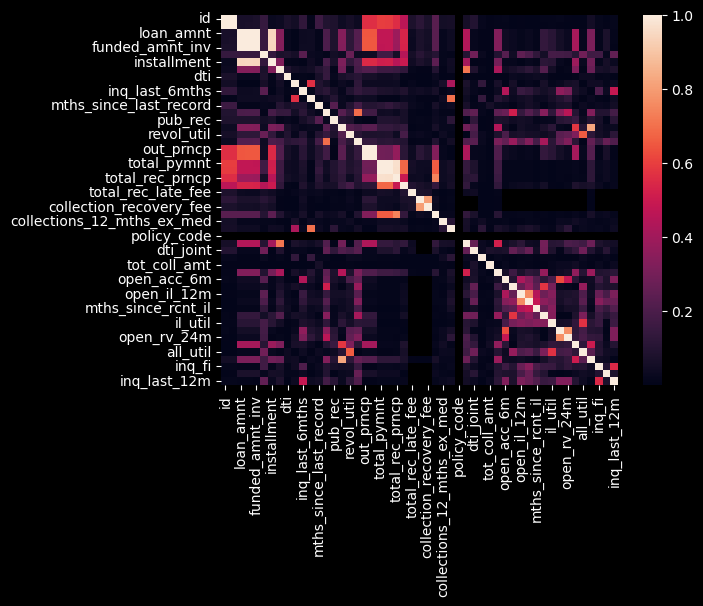

In [35]:
sns.heatmap(abs(loan.corr(numeric_only = True)));